In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
import nbformat
from scipy.stats import gaussian_kde
import geopandas as gpd
import contextily as ctx

In [2]:
df = pd.read_csv("../R/data_r_processed.csv")

In [3]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [4]:
# grop the df by id and take the mean of the values
df.groupby("Id")

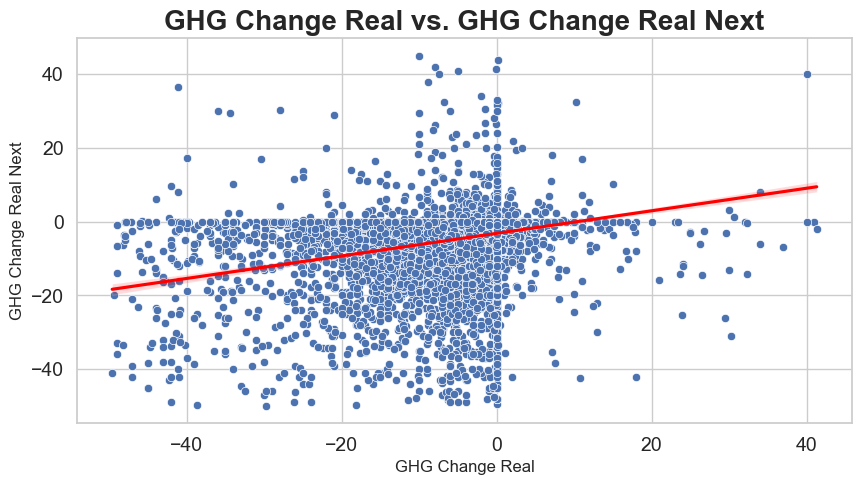

In [5]:
# plot ghg.change.real vs. ghg.change.real.next usig seaborn style seaborn include regression line
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
# group plot by
sns.scatterplot(x="Ghg.Change.Real", y="Ghg.Change.Real.Next", data=df)
# include regression line
sns.regplot(x="Ghg.Change.Real", y="Ghg.Change.Real.Next", data=df, scatter=False, color="red")
plt.xlabel("GHG Change Real")
plt.ylabel("GHG Change Real Next")
# make figure font bigger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# also title big and bold
plt.title("GHG Change Real vs. GHG Change Real Next", fontsize=20, fontweight="bold")
plt.savefig("../../thesis_tex/figures/ghg_change_real_vs_ghg_change_real_next.png")
plt.show()

# save plot as image


In [6]:
df["Year"] = df["Year"] + 2011

/var/folders/z7/jmcsyl9x47zdw6n1xd2_16jh0000gn/T/ipykernel_48765/1581401985.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Year", y="Ghg.Change.Real.Next", data=df, palette="Greens")
/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/fabrizioserafini/anacond

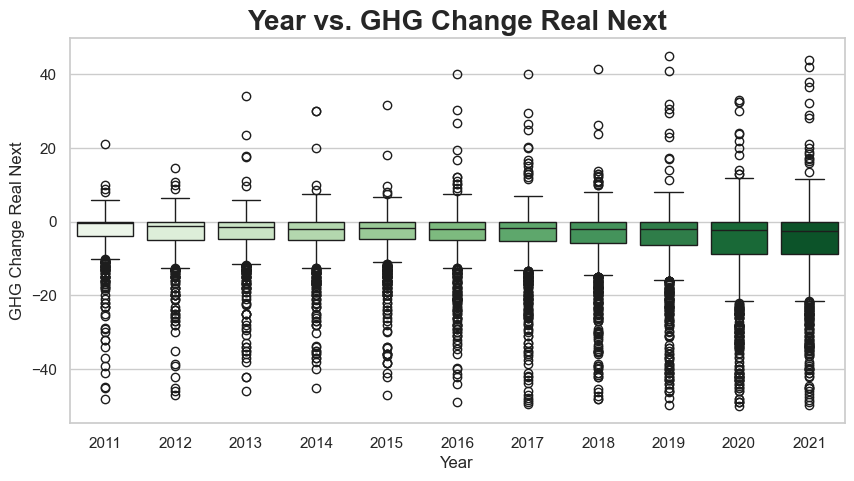

In [33]:
# do the same for year and ghg.change.real.next
plt.figure(figsize=(10, 5))
sns.boxplot(x="Year", y="Ghg.Change.Real.Next", data=df, palette="Greens")
# sns.regplot(x="Year", y="Ghg.Change.Real.Next", data=df, scatter=False, color="red")
plt.xlabel("Year")
plt.ylabel("GHG Change Real Next")
plt.title("Year vs. GHG Change Real Next", fontsize=20, fontweight="bold")
plt.savefig("../../thesis_tex/figures/year_vs_ghg_change_real_next.png")
plt.show()

# save plot as image


In [8]:
# now group by industry and year and calculate mean ghg.change.real.next plot it then
df_grouped = df.groupby(["Industry", "Year"])['Ghg.Change.Real.Next'].mean().reset_index()

/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


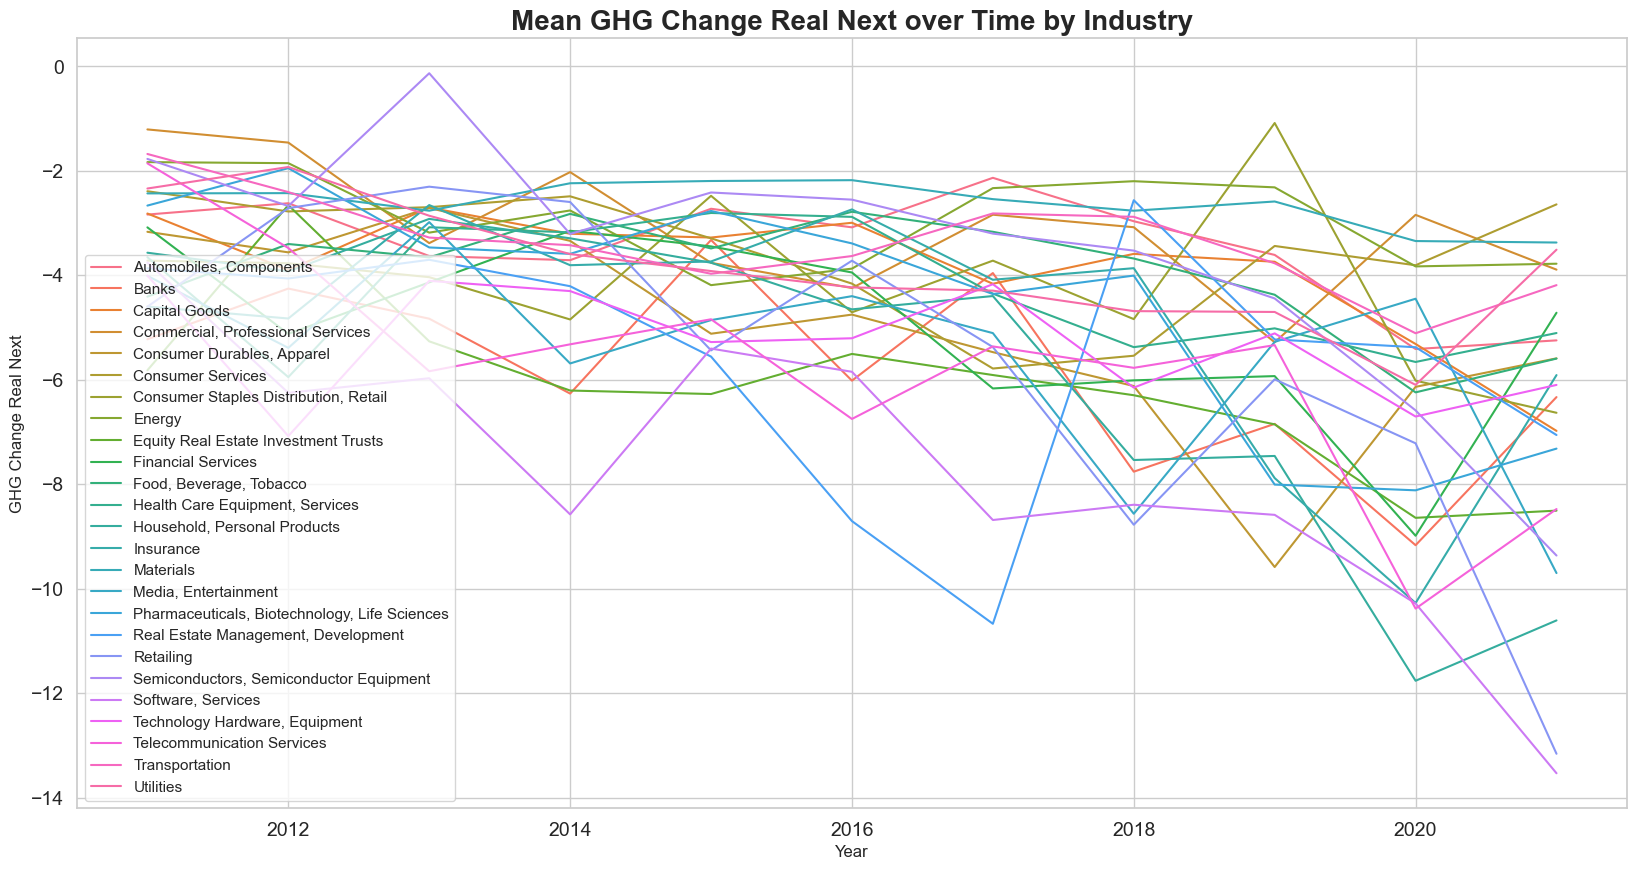

In [9]:
# now plot each as a lineplot with seaborn and use legend
plt.figure(figsize=(20, 10))
sns.lineplot(x="Year", y="Ghg.Change.Real.Next", hue="Industry", data=df_grouped)
plt.xlabel("Year")
plt.ylabel("GHG Change Real Next")
plt.title("Mean GHG Change Real Next over Time by Industry", fontsize=20, fontweight="bold")
# make it cool
plt.legend(loc="lower left")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("../../thesis_tex/figures/ghg_change_real_next_over_time_by_industry.png")
plt.show()


/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


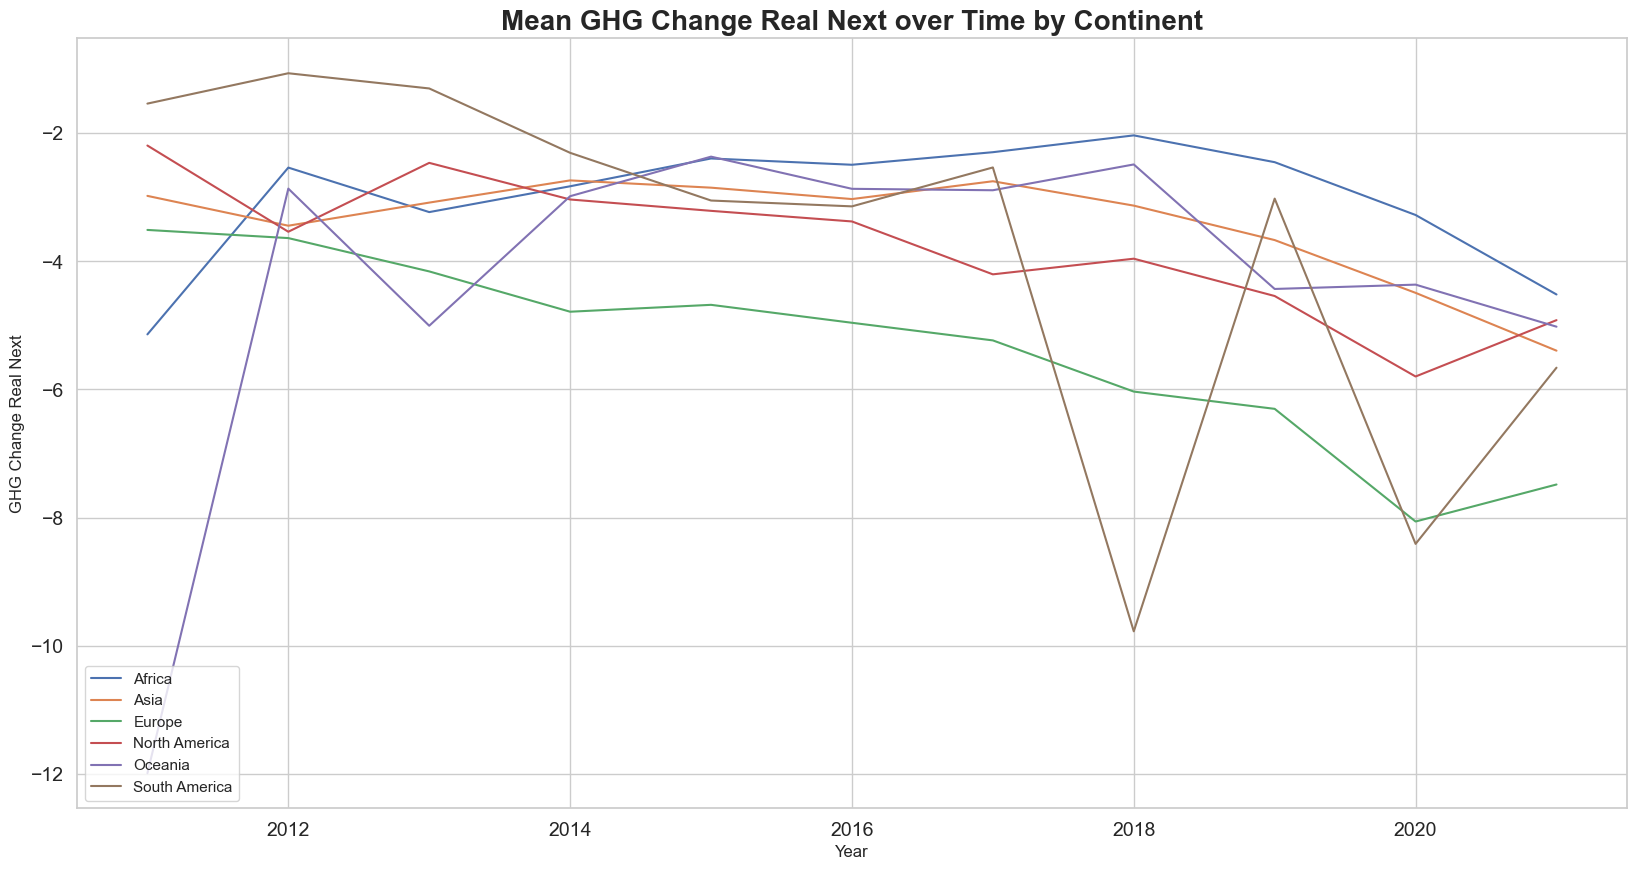

In [10]:
# do the same for continent
df_grouped = df.groupby(["Continent", "Year"])['Ghg.Change.Real.Next'].mean().reset_index()

# now plot each as a lineplot with seaborn and use legend
plt.figure(figsize=(20, 10))
sns.lineplot(x="Year", y="Ghg.Change.Real.Next", hue="Continent", data=df_grouped)
plt.xlabel("Year")
plt.ylabel("GHG Change Real Next")
plt.title("Mean GHG Change Real Next over Time by Continent", fontsize=20, fontweight="bold")
# make it cool
plt.legend(loc="lower left")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("../../thesis_tex/figures/ghg_change_real_next_over_time_by_continent.png")
plt.show()

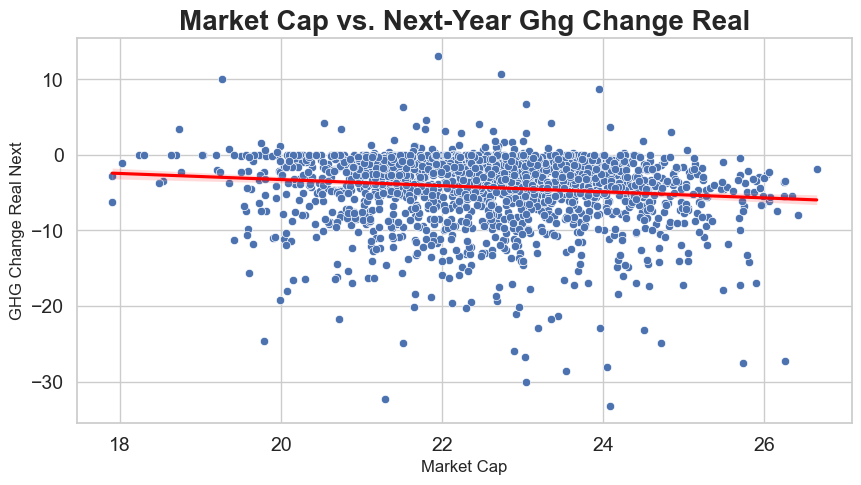

In [11]:
# ok now group firms by id, take the mean of ghg.change.real.next and market.cap and plot it
market_cap = df.groupby(["Id"])['Market.Cap'].mean().reset_index()
ghg_change = df.groupby(["Id"])['Ghg.Change.Real.Next'].mean().reset_index()

# now scatterplot it with seaborn, include regression line
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Market.Cap", y="Ghg.Change.Real.Next", data=pd.merge(market_cap, ghg_change, on="Id"))
sns.regplot(x="Market.Cap", y="Ghg.Change.Real.Next", data=pd.merge(market_cap, ghg_change, on="Id"), scatter=False, color="red")
plt.xlabel("Market Cap")
plt.ylabel("GHG Change Real Next")
plt.title("Market Cap vs. Next-Year Ghg Change Real", fontsize=20, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("../../thesis_tex/figures/market_cap_vs_ghg_change_real_next.png")
plt.show()


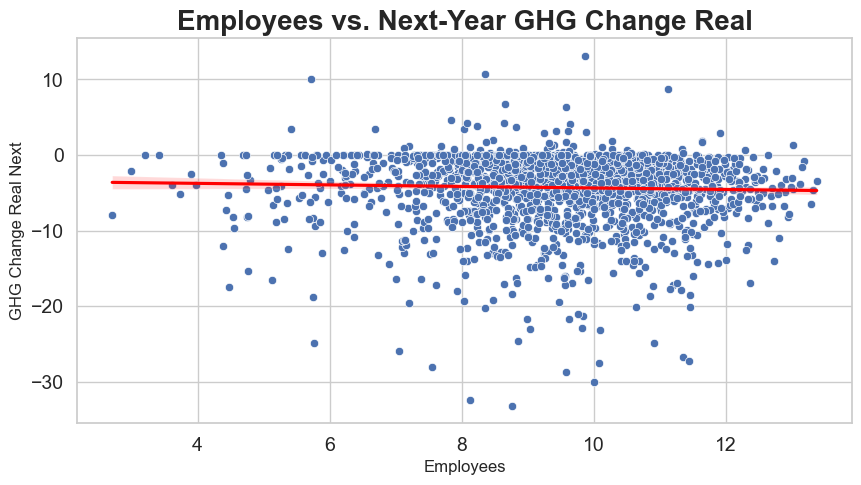

In [12]:
# do the same for employees
employees = df.groupby(["Id"])['Employees'].mean().reset_index()

# now scatterplot it with seaborn, include regression line
plt.figure(figsize=(10,5))
sns.scatterplot(x="Employees", y="Ghg.Change.Real.Next", data=pd.merge(employees, ghg_change, on="Id"))
sns.regplot(x="Employees", y="Ghg.Change.Real.Next", data=pd.merge(employees, ghg_change, on="Id"), scatter=False, color="red")
plt.xlabel("Employees")
plt.ylabel("GHG Change Real Next")
plt.title("Employees vs. Next-Year GHG Change Real", fontsize=20, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("../../thesis_tex/figures/employees_vs_ghg_change_real_next.png")
plt.show()

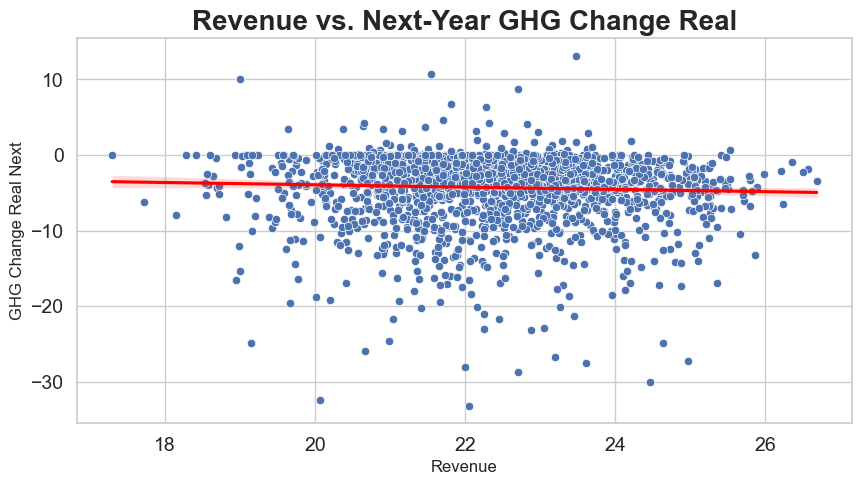

In [13]:
# do the same for Revenue
revenue = df.groupby(["Id"])['Revenue'].mean().reset_index()

# now scatterplot it with seaborn, include regression line
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Revenue", y="Ghg.Change.Real.Next", data=pd.merge(revenue, ghg_change, on="Id"))
sns.regplot(x="Revenue", y="Ghg.Change.Real.Next", data=pd.merge(revenue, ghg_change, on="Id"), scatter=False, color="red")
plt.xlabel("Revenue")
plt.ylabel("GHG Change Real Next")
plt.title("Revenue vs. Next-Year GHG Change Real", fontsize=20, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("../../thesis_tex/figures/revenue_vs_ghg_change_real_next.png")
plt.show()

/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


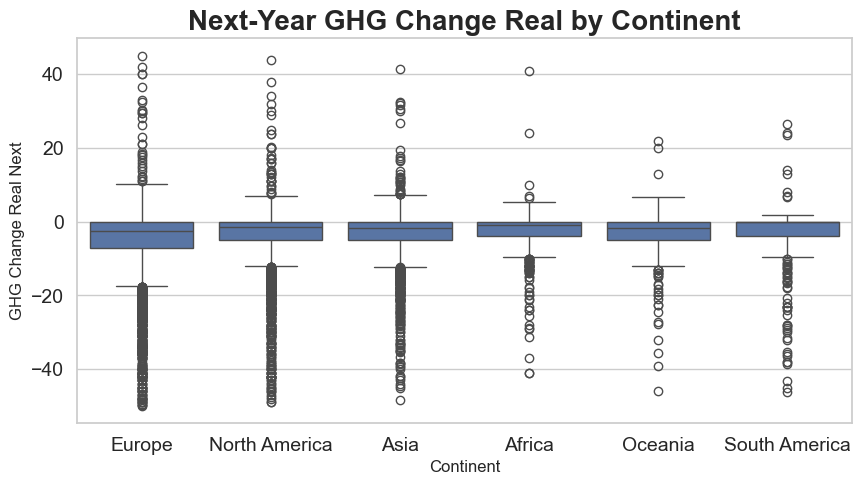

In [14]:
# now do a box plot for Continent
plt.figure(figsize=(10, 5))
sns.boxplot(x="Continent", y="Ghg.Change.Real.Next", data=df)
plt.xlabel("Continent")
plt.ylabel("GHG Change Real Next")
plt.title("Next-Year GHG Change Real by Continent", fontsize=20, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig("../../thesis_tex/figures/ghg_change_real_next_by_continent.png")
plt.show()

/var/folders/z7/jmcsyl9x47zdw6n1xd2_16jh0000gn/T/ipykernel_48765/341257678.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Type.Scope1", y="Ghg.Change.Real.Next", data=df, palette="Greens")
/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/fabrizioserafini/a

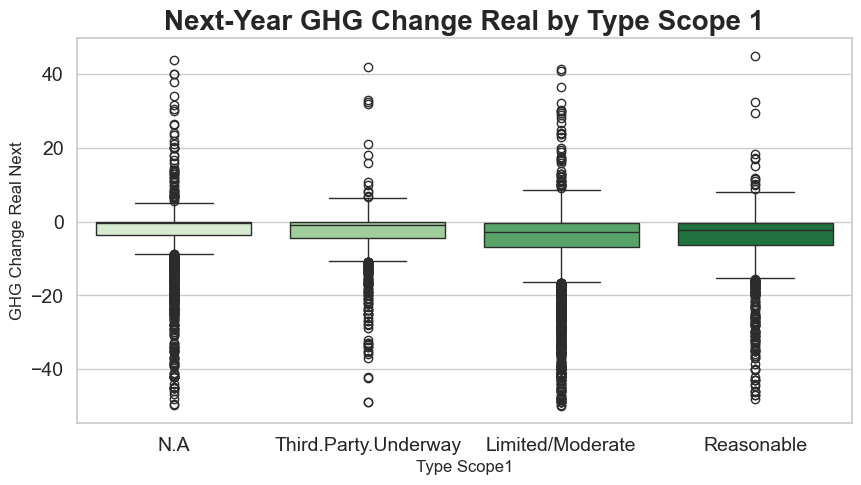

In [15]:
# boxplot of df['Type.Scope1']
plt.figure(figsize=(10, 5))
# make the boxes green
sns.boxplot(x="Type.Scope1", y="Ghg.Change.Real.Next", data=df, palette="Greens")
plt.xlabel("Type Scope1")
plt.ylabel("GHG Change Real Next")
plt.title("Next-Year GHG Change Real by Type Scope 1", fontsize=20, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("../../thesis_tex/figures/ghg_change_real_next_by_type_scope1.png")
plt.show()

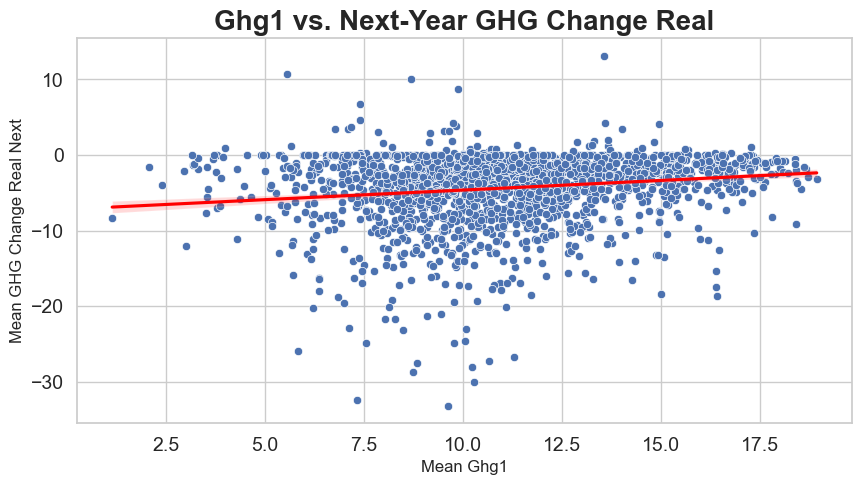

In [16]:
# plot with regression line of df['Ghg1'] exclude zeros 
ghg1 = df[df["Ghg1"] > 0]
# group by Id
ghg1 = ghg1.groupby(["Id"])["Ghg1"].mean().reset_index()
# now scatterplot it with seaborn, include regression line
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Ghg1", y="Ghg.Change.Real.Next", data=pd.merge(ghg1, ghg_change, on="Id"))
sns.regplot(x="Ghg1", y="Ghg.Change.Real.Next", data=pd.merge(ghg1, ghg_change, on="Id"), scatter=False, color="red")
plt.xlabel("Mean Ghg1")
plt.ylabel("Mean GHG Change Real Next")
plt.title("Ghg1 vs. Next-Year GHG Change Real", fontsize=20, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("../../thesis_tex/figures/ghg1_vs_ghg_change_real_next.png")
plt.show()

/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


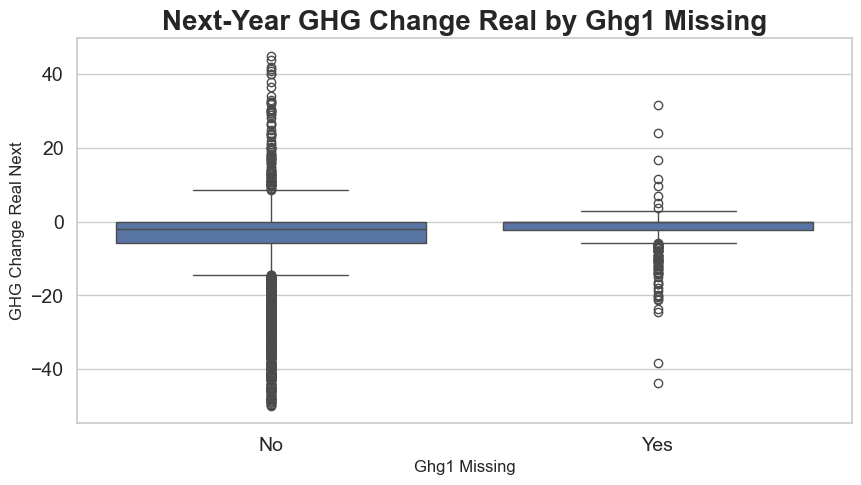

In [17]:
# box plot of Ghg1.Na
plt.figure(figsize=(10, 5))
sns.boxplot(x="Ghg1.Na", y="Ghg.Change.Real.Next", data=df)
plt.xlabel("Ghg1 Missing")
plt.ylabel("GHG Change Real Next")
plt.title("Next-Year GHG Change Real by Ghg1 Missing", fontsize=20, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# call 0 "No" and 1 "Yes"
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.savefig("../../thesis_tex/figures/ghg_change_real_next_by_ghg1_na.png")
plt.show()


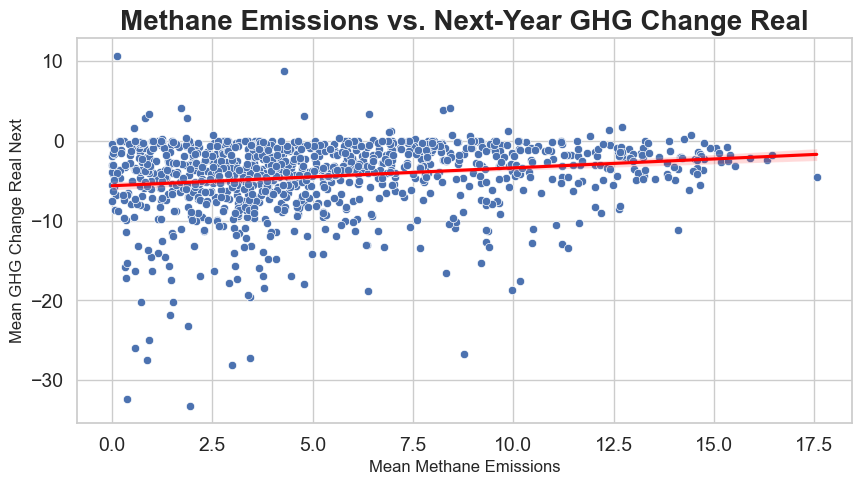

In [18]:
# scatter plot of methane emissions with regression line remove zeroes
methane = df[df["Methane.Emissions"] > 0]
# group by Id
methane = methane.groupby(["Id"])["Methane.Emissions"].mean().reset_index()
# now scatterplot it with seaborn, include regression line
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Methane.Emissions", y="Ghg.Change.Real.Next", data=pd.merge(methane, ghg_change, on="Id"))
sns.regplot(x="Methane.Emissions", y="Ghg.Change.Real.Next", data=pd.merge(methane, ghg_change, on="Id"), scatter=False, color="red")
plt.xlabel("Mean Methane Emissions")
plt.ylabel("Mean GHG Change Real Next")
plt.title("Methane Emissions vs. Next-Year GHG Change Real", fontsize=20, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("../../thesis_tex/figures/methane_emissions_vs_ghg_change_real_next.png")
plt.show()


/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


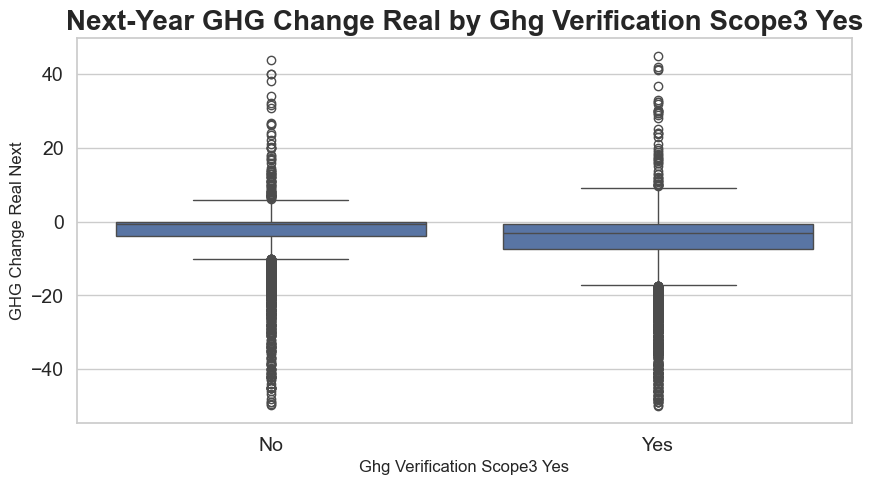

In [19]:
# boxplot of df['Ghg.Verification.Scope3.Yes']
plt.figure(figsize=(10, 5))
sns.boxplot(x="Ghg.Verification.Scope3.Yes", y="Ghg.Change.Real.Next", data=df)
plt.xlabel("Ghg Verification Scope3 Yes")
plt.ylabel("GHG Change Real Next")
plt.title("Next-Year GHG Change Real by Ghg Verification Scope3 Yes", fontsize=20, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# call 0 "No" and 1 "Yes"
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.savefig("../../thesis_tex/figures/ghg_change_real_next_by_ghg_verification_scope3_yes.png")
plt.show()

Incentives

/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


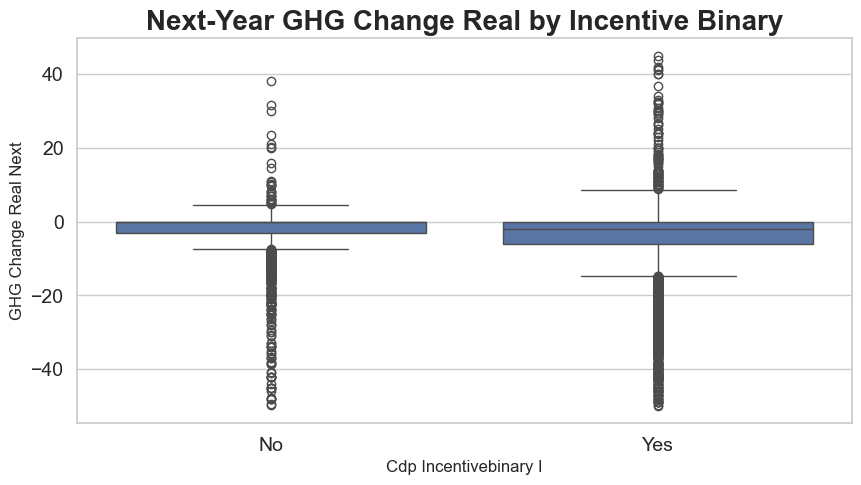

In [20]:
# boxplot of df['Cdp.Incentivebinary.I']
plt.figure(figsize=(10, 5))
sns.boxplot(x="Cdp.Incentivebinary.I", y="Ghg.Change.Real.Next", data=df)
plt.xlabel("Cdp Incentivebinary I")
plt.ylabel("GHG Change Real Next")
plt.title("Next-Year GHG Change Real by Incentive Binary", fontsize=20, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# call 0 "No" and 1 "Yes"
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.savefig("../../thesis_tex/figures/ghg_change_real_next_by_cdp_incentivebinary_i.png")
plt.show()

/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


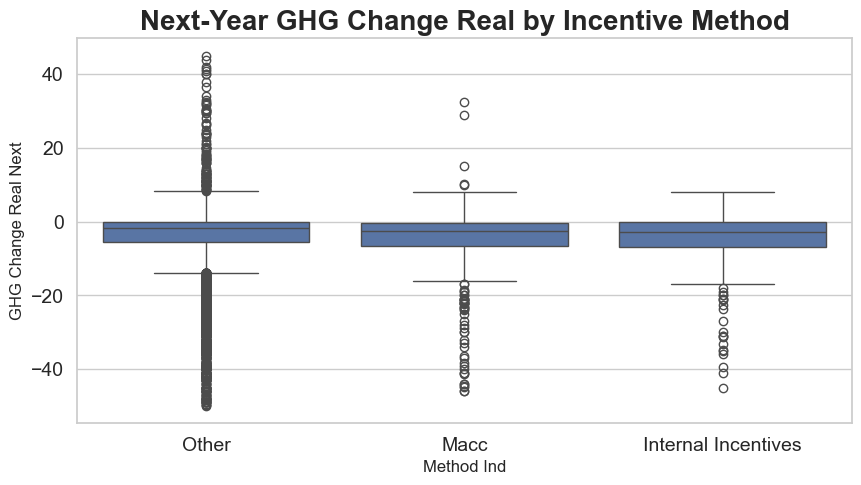

In [21]:
#boxplot of df['Method.Ind']
plt.figure(figsize=(10, 5))
sns.boxplot(x="Method.Ind", y="Ghg.Change.Real.Next", data=df)
plt.xlabel("Method Ind")
plt.ylabel("GHG Change Real Next")
plt.title("Next-Year GHG Change Real by Incentive Method", fontsize=20, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("../../thesis_tex/figures/ghg_change_real_next_by_method_ind.png")
plt.show()

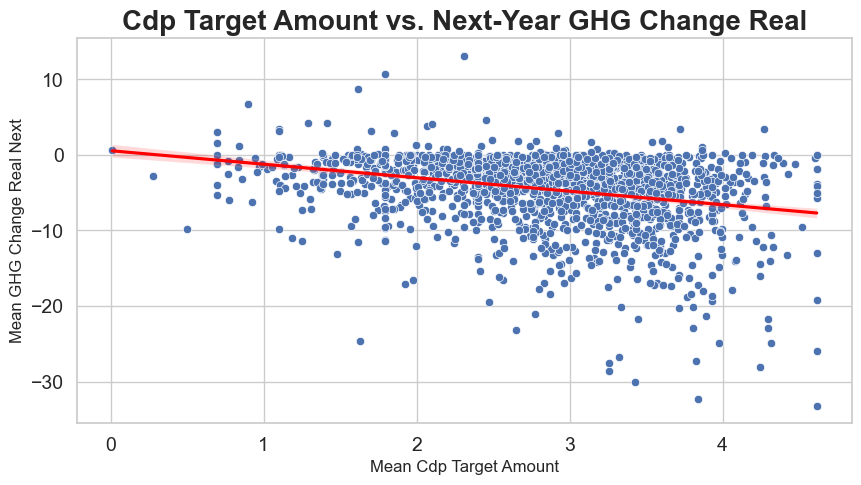

In [22]:
# scatter with line df['Cdp.Targetamount.Mean'] 
# remove zeros
cdp_target = df[df["Cdp.Targetamount.Mean"] > 0]
# group by Id
cdp_target = cdp_target.groupby(["Id"])["Cdp.Targetamount.Mean"].mean().reset_index()
# now scatterplot it with seaborn, include regression line
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Cdp.Targetamount.Mean", y="Ghg.Change.Real.Next", data=pd.merge(cdp_target, ghg_change, on="Id"))
sns.regplot(x="Cdp.Targetamount.Mean", y="Ghg.Change.Real.Next", data=pd.merge(cdp_target, ghg_change, on="Id"), scatter=False, color="red")
plt.xlabel("Mean Cdp Target Amount")
plt.ylabel("Mean GHG Change Real Next")
plt.title("Cdp Target Amount vs. Next-Year GHG Change Real", fontsize=20, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("../../thesis_tex/figures/cdp_target_amount_vs_ghg_change_real_next.png")
plt.show()

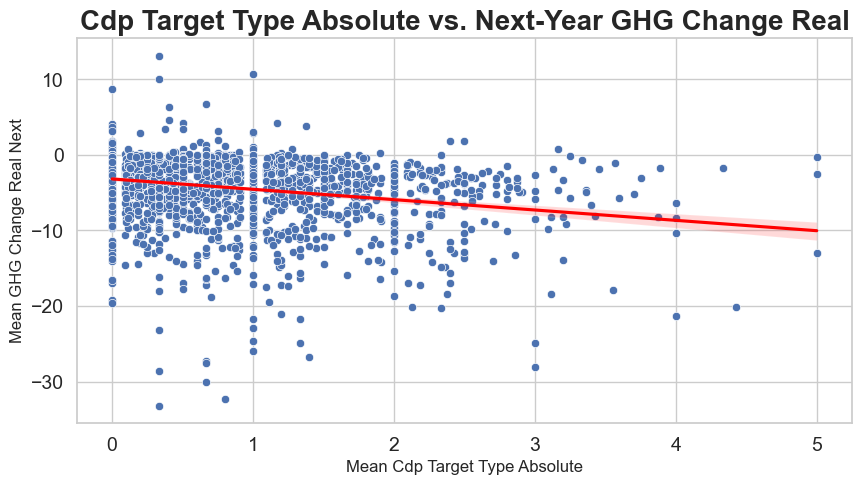

In [23]:
# scatter of df['Cdp.Targettype.Absolute'] with regression line remove points more than 15
cdp_targettype = df[df["Cdp.Targettype.Absolute"] < 6]
# group by Id
cdp_targettype = cdp_targettype.groupby(["Id"])["Cdp.Targettype.Absolute"].mean().reset_index()
# now scatterplot it with seaborn, include regression line
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Cdp.Targettype.Absolute", y="Ghg.Change.Real.Next", data=pd.merge(cdp_targettype, ghg_change, on="Id"))
sns.regplot(x="Cdp.Targettype.Absolute", y="Ghg.Change.Real.Next", data=pd.merge(cdp_targettype, ghg_change, on="Id"), scatter=False, color="red")
plt.xlabel("Mean Cdp Target Type Absolute")
plt.ylabel("Mean GHG Change Real Next")
plt.title("Cdp Target Type Absolute vs. Next-Year GHG Change Real", fontsize=20, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("../../thesis_tex/figures/cdp_target_type_absolute_vs_ghg_change_real_next.png")
plt.show()

In [24]:
df['Cdp.Targettype.Absolute'].describe()

count    13741.000000
mean         0.929481
std          1.252731
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         17.000000
Name: Cdp.Targettype.Absolute, dtype: float64

/var/folders/z7/jmcsyl9x47zdw6n1xd2_16jh0000gn/T/ipykernel_48765/1035261586.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cdp.Aggregated.Risk", y="Ghg.Change.Real.Next", data=df, palette="Reds")
/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/fabrizioser

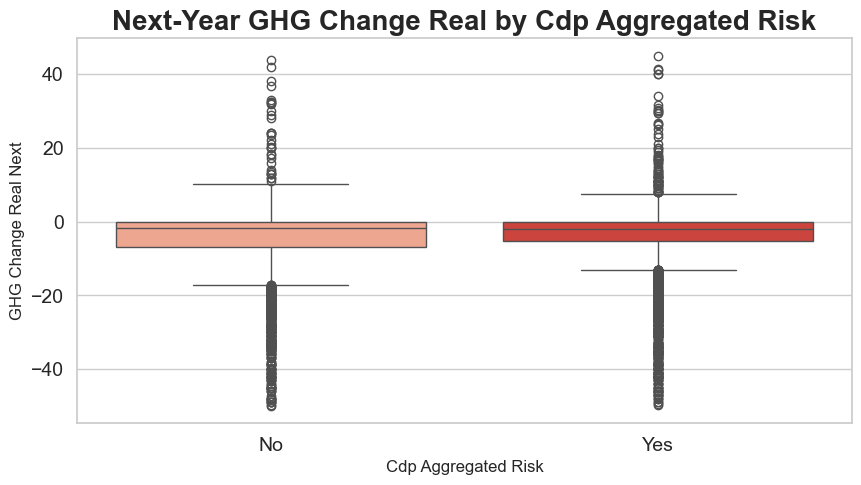

In [25]:
# boxplot of df['Cdp.Aggregated.Risk']
plt.figure(figsize=(10, 5))
sns.boxplot(x="Cdp.Aggregated.Risk", y="Ghg.Change.Real.Next", data=df, palette="Reds")
plt.xlabel("Cdp Aggregated Risk")
plt.ylabel("GHG Change Real Next")
plt.title("Next-Year GHG Change Real by Cdp Aggregated Risk", fontsize=20, fontweight="bold")
# label 0 "No" and 1 "Yes"
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("../../thesis_tex/figures/ghg_change_real_next_by_cdp_aggregated_risk.png")
plt.show()

/var/folders/z7/jmcsyl9x47zdw6n1xd2_16jh0000gn/T/ipykernel_48765/3657462767.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cdp.Aggregated.Opp", y="Ghg.Change.Real.Next", data=df, palette="Greens")
/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/fabriziose

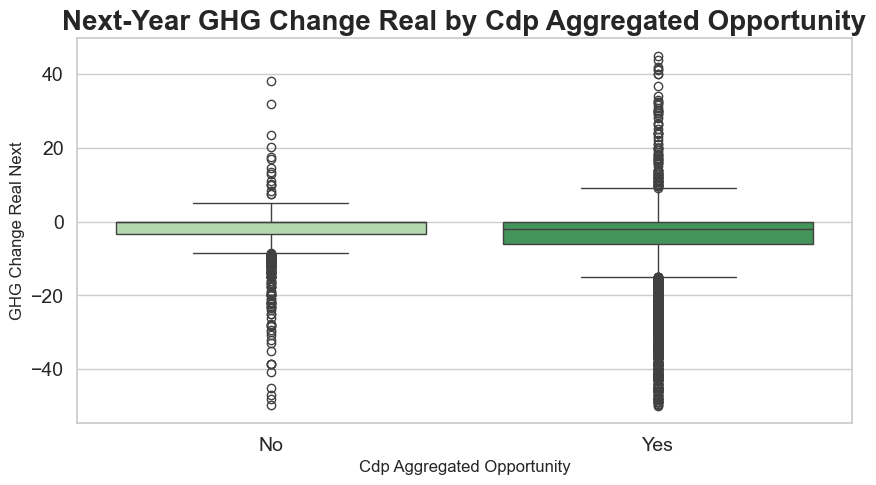

In [26]:
# do the same for df['Cdp.Aggregated.Opp']
plt.figure(figsize=(10, 5))
sns.boxplot(x="Cdp.Aggregated.Opp", y="Ghg.Change.Real.Next", data=df, palette="Greens")
plt.xlabel("Cdp Aggregated Opportunity")
plt.ylabel("GHG Change Real Next")
plt.title("Next-Year GHG Change Real by Cdp Aggregated Opportunity", fontsize=20, fontweight="bold")
# label 0 "No" and 1 "Yes"
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("../../thesis_tex/figures/ghg_change_real_next_by_cdp_aggregated_opportunity.png")
plt.show()

Initiatives and Investments

/var/folders/z7/jmcsyl9x47zdw6n1xd2_16jh0000gn/T/ipykernel_48765/2757789432.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Absent.Cdp.Initiative.Firm.Year.Processed.Csv", y="Ghg.Change.Real.Next", data=df, palette="Blues")
/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtyp

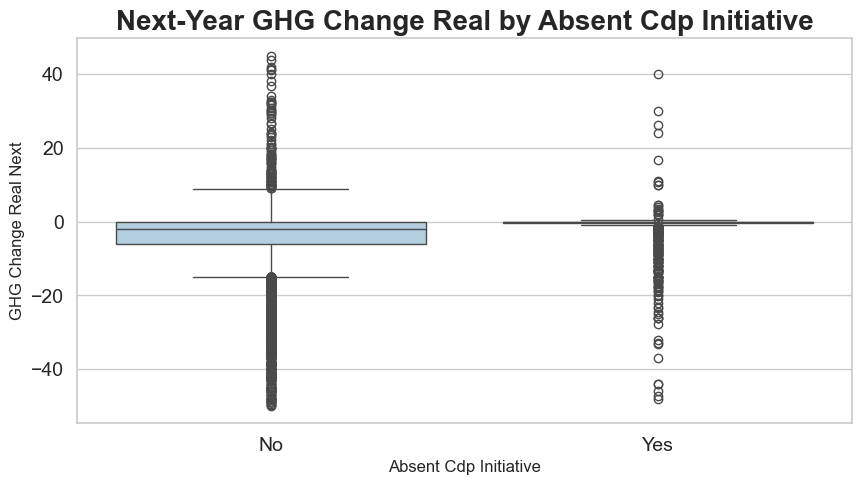

In [27]:
# boxplot df['Absent.Cdp.Initiative.Firm.Year.Processed.Csv']
plt.figure(figsize=(10, 5))
sns.boxplot(x="Absent.Cdp.Initiative.Firm.Year.Processed.Csv", y="Ghg.Change.Real.Next", data=df, palette="Blues")
plt.xlabel("Absent Cdp Initiative")
plt.ylabel("GHG Change Real Next")
plt.title("Next-Year GHG Change Real by Absent Cdp Initiative", fontsize=20, fontweight="bold")
# label 0 "No" and 1 "Yes"
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("../../thesis_tex/figures/ghg_change_real_next_by_absent_cdp_initiative.png")
plt.show()

/var/folders/z7/jmcsyl9x47zdw6n1xd2_16jh0000gn/T/ipykernel_48765/3487665243.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Investment.Counter", y="Ghg.Change.Real.Next", data=df, palette="Purples")
/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/fabrizios

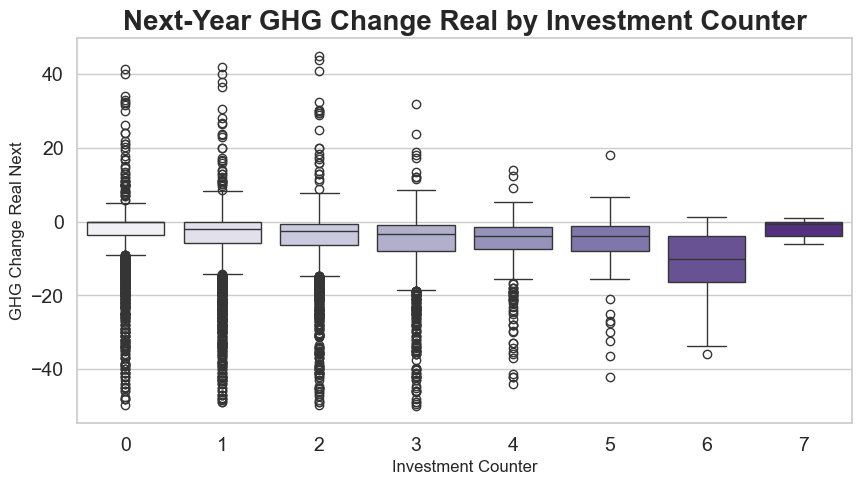

In [28]:
# boxplot df['Investment.Counter']
plt.figure(figsize=(10, 5))
sns.boxplot(x="Investment.Counter", y="Ghg.Change.Real.Next", data=df, palette="Purples")
plt.xlabel("Investment Counter")
plt.ylabel("GHG Change Real Next")
plt.title("Next-Year GHG Change Real by Investment Counter", fontsize=20, fontweight="bold")

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("../../thesis_tex/figures/ghg_change_real_next_by_investment_counter.png")
plt.show()